# TITANIC DATASET ACCORDING TO KAGGLE COMPETITION.

FIRST TRAINING DATA SET IS TAKEN AND IS SPLIT INTO TRAINING AND TESTING TO BUILD THE MODEL.

In [2]:
#import the libraries
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

#import the dataset
dataset =pd.read_csv('train.csv')   #WITH WHAT WE ARE GOING TO BE WORKING ON


In [3]:
#taking care of missing data in age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(dataset.iloc[:, 5:7])
dataset.iloc[:, 5:7] = imputer.transform(dataset.iloc[:, 5:7])

#FOR missing data in CABIN
dataset['Cabin'] = dataset['Cabin'].fillna('Unknown')

#labeling the dataset
inputdataset= dataset.iloc[:,[2,4,5,6,7,9]]
Outputdataset= dataset.iloc[:,1]

In [4]:
inputdataset

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1.0,0,7.2500
1,1,female,38.000000,1.0,0,71.2833
2,3,female,26.000000,0.0,0,7.9250
3,1,female,35.000000,1.0,0,53.1000
4,3,male,35.000000,0.0,0,8.0500
5,3,male,29.699118,0.0,0,8.4583
6,1,male,54.000000,0.0,0,51.8625
7,3,male,2.000000,3.0,1,21.0750
8,3,female,27.000000,0.0,2,11.1333
9,2,female,14.000000,1.0,0,30.0708


In [5]:
Outputdataset

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
#encoding the categorical variable
from sklearn.preprocessing import LabelEncoder
labelencoder_sex=LabelEncoder()
inputdataset.iloc[:,1]=labelencoder_sex.fit_transform(inputdataset.iloc[:,1])

#splitting the "dataset" into the Training set and test set
from sklearn.model_selection import train_test_split 
x_train , x_test, y_train , y_test= train_test_split(inputdataset, Outputdataset, test_size=0.2,random_state=0 )

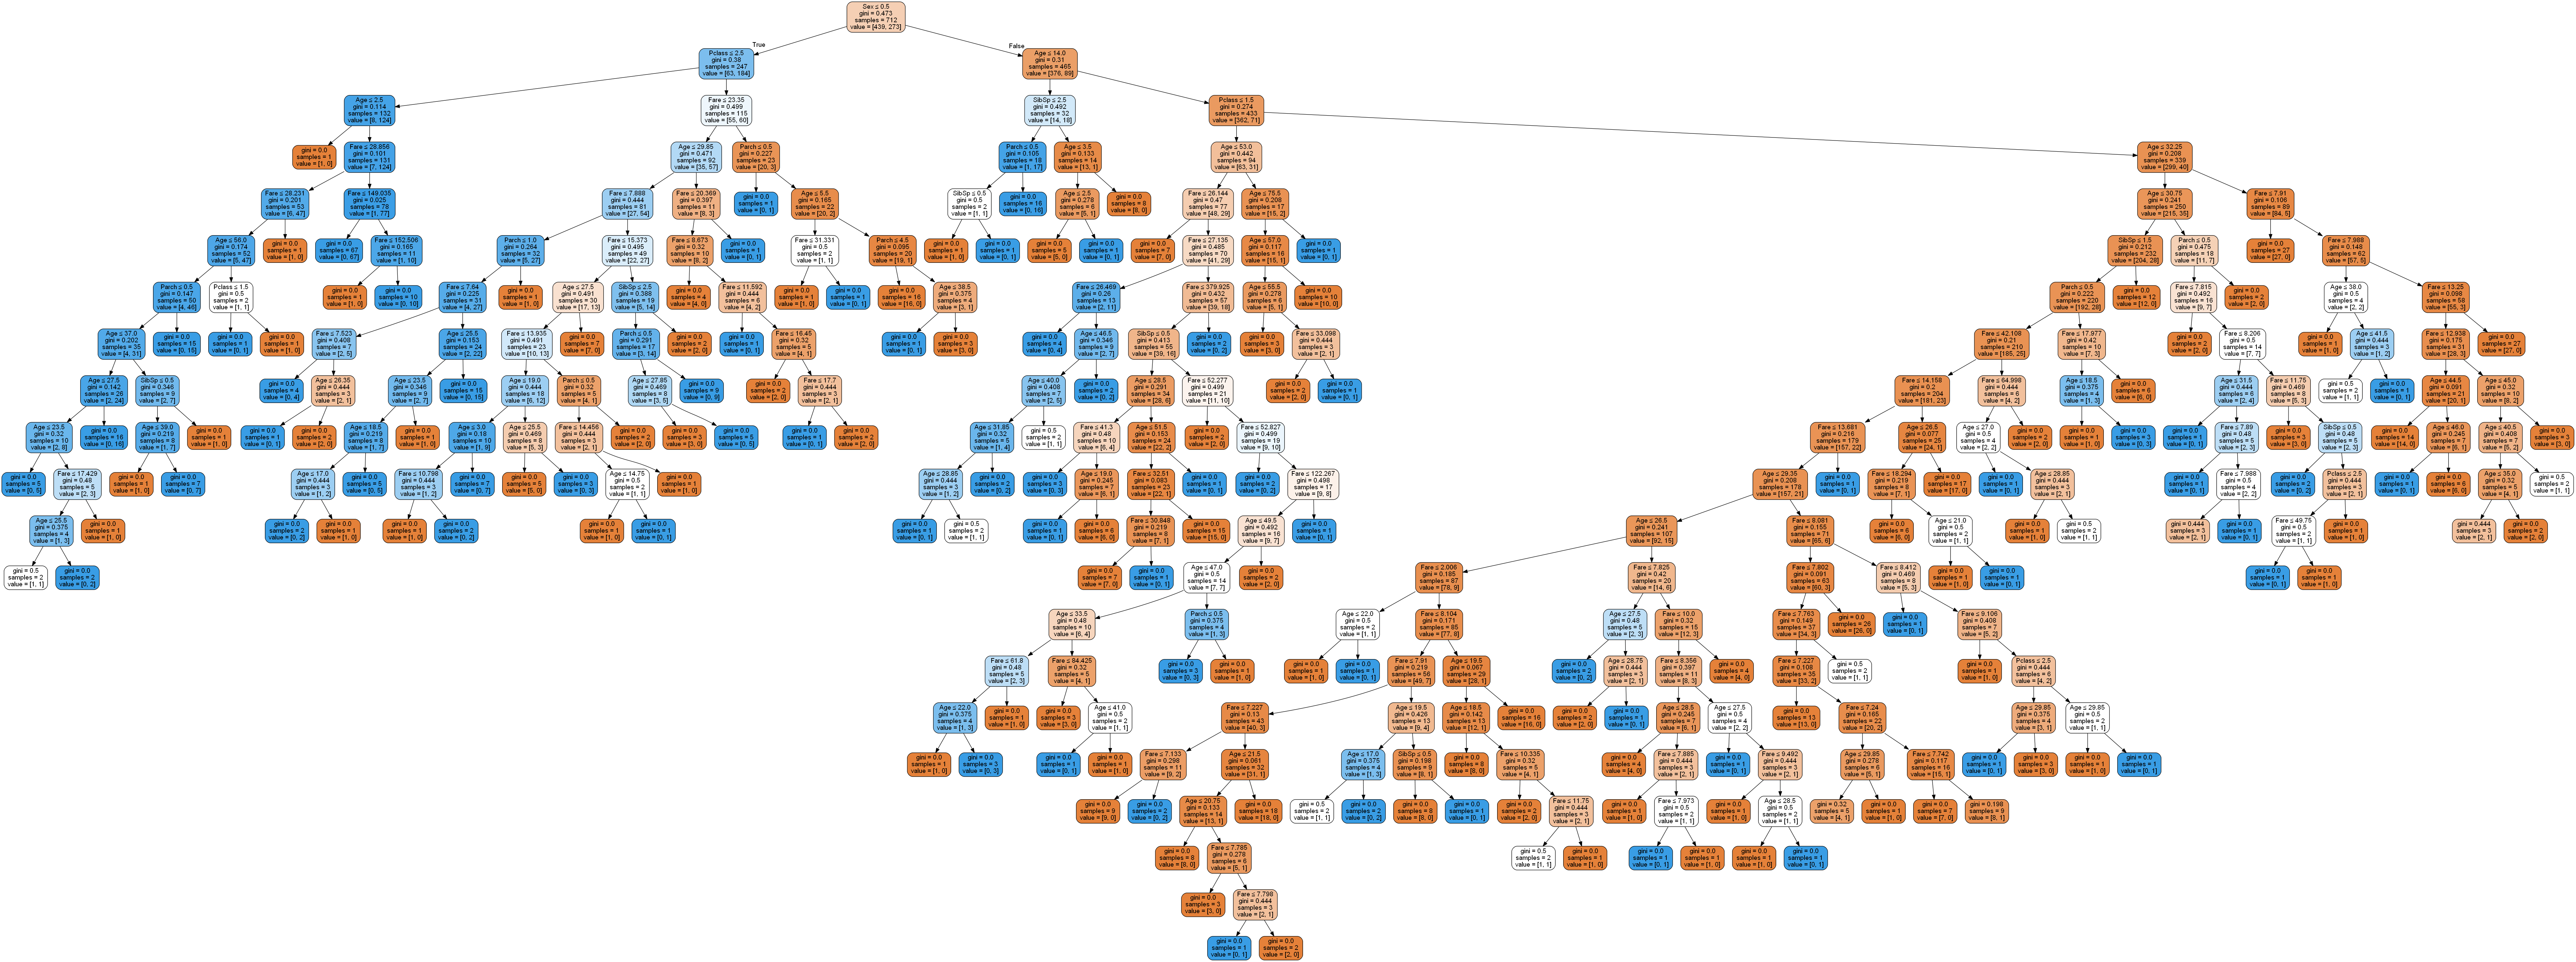

In [8]:
from sklearn import tree
import graphviz
from IPython.display import Image  
import pydotplus

non_pruned_clf = DecisionTreeClassifier().fit(x_train, y_train)

#DECISION TREE DIAGRAM OF A NON-PRUNED TREE
dot_data = tree.export_graphviz(non_pruned_clf, out_file=None,
                          filled=True, rounded=True,
                special_characters=True, feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width=12700, height=12800)


In [9]:
from sklearn.metrics import accuracy_score

training_accuracy= accuracy_score(y_train, non_pruned_clf.predict(x_train))
testing_accuracy= accuracy_score(y_test, non_pruned_clf.predict(x_test))

In [10]:
training_accuracy,testing_accuracy     #NON PRUNED TREE ACCURACY. =>OVERFITTING

(0.9817415730337079, 0.7821229050279329)

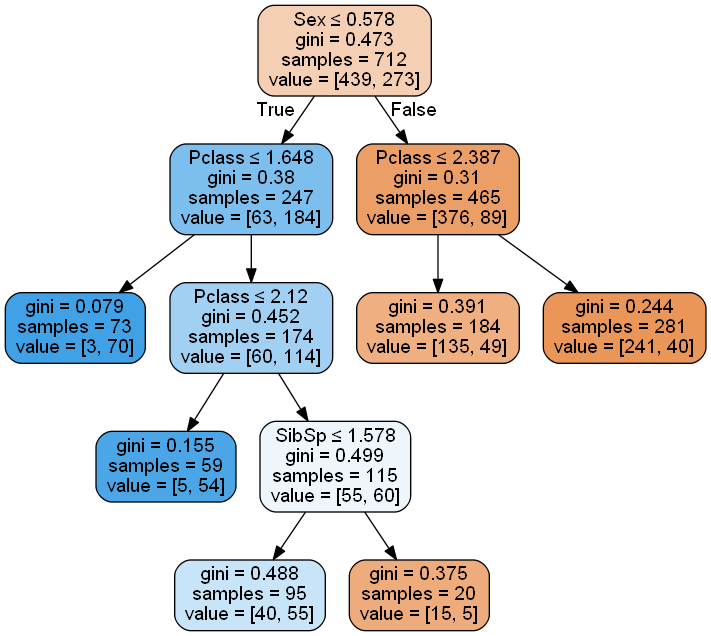

In [11]:
pruned_clf = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 6, min_samples_leaf = 4, max_depth= 6).fit(x_train, y_train)

#DECISION TREE DIAGRAM
dot_data = tree.export_graphviz(pruned_clf, out_file=None,
                          filled=True, rounded=True,
                special_characters=True, feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width=700, height=800)


In [12]:
training_accuracy= accuracy_score(y_train, pruned_clf.predict(x_train))
testing_accuracy= accuracy_score(y_test, pruned_clf.predict(x_test))

In [13]:
training_accuracy,testing_accuracy       #PRUNED TREE ACCURACY. NOT OVERFITTING.

(0.800561797752809, 0.7932960893854749)

THE MODEL IS BUILT!

# MODEL FOR KAGGLE COMPETITION TESTING DATA.

In [15]:
TO_CHECK= pd.read_csv('test.csv')                #USED TO CHECK ACCURACY IN KAGGLE
PassengerId = TO_CHECK['PassengerId']            #for extraction to upload in the competition

#categorizing sex
from sklearn.preprocessing import LabelEncoder
labelencoder_sex=LabelEncoder()
TO_CHECK.iloc[:,3]=labelencoder_sex.fit_transform(TO_CHECK.iloc[:,3])

#setting input features
test_input= TO_CHECK.iloc[:,[1,3,4,5,6,8]]

#taking care of missing data 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(test_input.iloc[:,:])
test_input.iloc[:,:] = imputer.transform(test_input.iloc[:,:])


C:\Users\Nishanth\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
test_input

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,34.50000,0.0,0.0,7.8292
1,3.0,0.0,47.00000,1.0,0.0,7.0000
2,2.0,1.0,62.00000,0.0,0.0,9.6875
3,3.0,1.0,27.00000,0.0,0.0,8.6625
4,3.0,0.0,22.00000,1.0,1.0,12.2875
5,3.0,1.0,14.00000,0.0,0.0,9.2250
6,3.0,0.0,30.00000,0.0,0.0,7.6292
7,2.0,1.0,26.00000,1.0,1.0,29.0000
8,3.0,0.0,18.00000,0.0,0.0,7.2292
9,3.0,1.0,21.00000,2.0,0.0,24.1500


In [16]:
pruned_clf = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 6, min_samples_leaf = 4, max_depth= 6).fit(x_train, y_train)


In [17]:
y_pred = pruned_clf.predict(test_input)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [23]:
y_pred


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# The above model resulted in 79% accuracy on kaggle

# Another method we use to improve the accuracy over 85% is Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

random_forest.score(x_train, y_train)

0.9817415730337079

In [21]:
y_pred = random_forest.predict(test_input)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission2.csv', index=False)

In [22]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,